In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 통계 정보 값이 너무 커서 지수로 표현될 떄 변환
pd.set_option("float_format", "{:.0f}".format)

# 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)
# df 테이블 행 모두 출력되도록 펼치는 방법
pd.set_option('display.max_rows', 10000)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,424 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

In [ ]:
xoct_df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/2019_10.csv')
nov_df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/2019_11.csv')
dec_df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/2019_12.csv')
jan_df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/2020_01.csv')
feb_df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/2020_02.csv')

df = pd.concat([oct_df, nov_df, dec_df, jan_df, feb_df], axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17639132 entries, 0 to 4156681
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.3+ GB


In [ ]:
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580000000000000,NaN,runail,3,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580000000000000,NaN,runail,3,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151190000000000000,NaN,lovely,13,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


## 데이터 전처리

In [ ]:
# 'category_code' 컬럼 삭제
df.drop(['category_code'], axis=1, inplace=True)
df.head(3)

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580000000000000,runail,3,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580000000000000,runail,3,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151190000000000000,lovely,13,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [ ]:
df.describe(include='all')

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
count,17639132,17639132,17639132,17639132,10124990,17639132,17639132,17635086
unique,7424770,4,NaN,NaN,272,NaN,NaN,3886500
top,2020-02-15 16:08:37 UTC,view,NaN,NaN,runail,NaN,NaN,74206ba1-c863-4760-bbdc-b11777059e46
freq,3087,8237771,NaN,NaN,1325155,NaN,NaN,5411
mean,NaN,NaN,5488248,1556053024747783680,NaN,9,525320428,NaN
std,NaN,NaN,1300583,171479967483666144,NaN,19,87666458,NaN
min,NaN,NaN,3752,1487580000000000000,NaN,-79,465496,NaN
25%,NaN,NaN,5726172,1487580005671109376,NaN,2,486620071,NaN
50%,NaN,NaN,5811800,1487580008246412288,NaN,4,556045950,NaN
75%,NaN,NaN,5859199,1487580013506068736,NaN,7,584777782,NaN


### 1. price

<ipython-input-9-7ba99c80b68d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

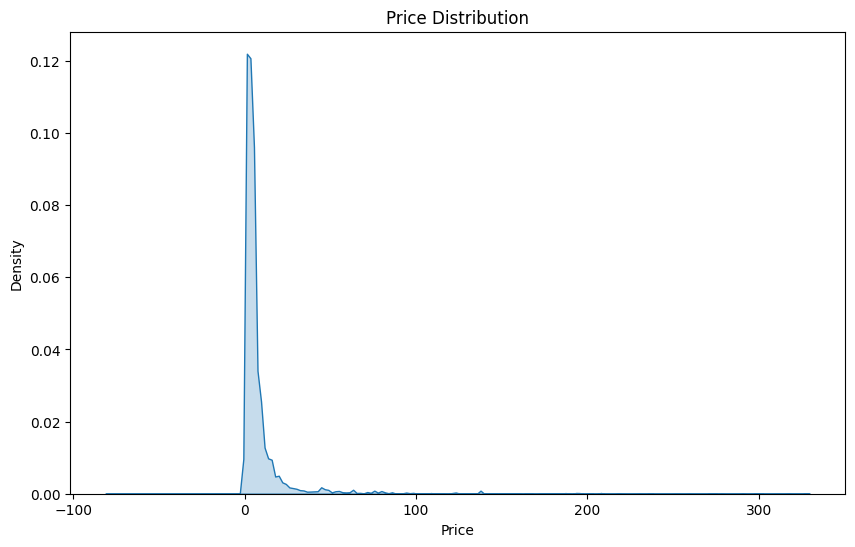

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], shade=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show

In [ ]:
zero_price = len(df[df['price'] == 0])
print(f'가격이 0인 행 {zero_price}개')

가격이 0인 행 99316개


In [ ]:
no_price_df = df[df['price'] < 0]
no_price = len(df[df['price'] < 0])
print(f'가격이 0보다 작은 행 {no_price}개')

가격이 0보다 작은 행 115개


In [ ]:
no_price_df.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
112860,2019-10-01 19:10:56 UTC,purchase,5716857,1487580000000000000,NaN,-24,552507528,dcdd60c6-1a70-442d-bfb2-0252879054ad
198302,2019-10-02 08:30:03 UTC,purchase,5716855,1487580000000000000,NaN,-8,550375225,5ddec778-9464-4514-914d-be7b751b8e2c
436918,2019-10-03 17:37:04 UTC,purchase,5716859,1487580000000000000,NaN,-48,555414763,479149eb-1807-4178-8f6b-87c642350735
443204,2019-10-03 18:25:39 UTC,purchase,5670257,1487580000000000000,NaN,-16,556383221,4333d203-bc4d-4d0d-a6e1-0ea3a97a28c1
73174,2019-11-01 15:36:23 UTC,purchase,5716855,1487580014042939648,NaN,-8,566480066,34fa4291-9e2e-470f-a678-b84d9bbbdfe3


In [ ]:
no_price_df[no_price_df['user_id'] == 556383221]

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
443204,2019-10-03 18:25:39 UTC,purchase,5670257,1487580000000000000,NaN,-16,556383221,4333d203-bc4d-4d0d-a6e1-0ea3a97a28c1


In [ ]:
df[(df['user_id'] == 556383221) & (df['product_id'] == 5670257)]

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
443204,2019-10-03 18:25:39 UTC,purchase,5670257,1487580000000000000,NaN,-16,556383221,4333d203-bc4d-4d0d-a6e1-0ea3a97a28c1


In [ ]:
df = df[df['price'] >= 0]

In [ ]:
df['price'].describe()

count   17639017
mean           9
std           19
min            0
25%            2
50%            4
75%            7
max          328
Name: price, dtype: float64

<ipython-input-17-7ba99c80b68d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

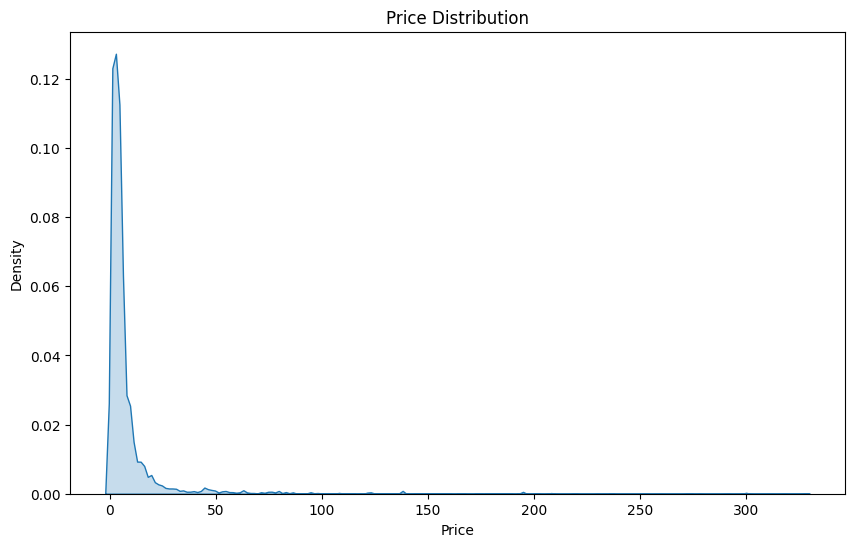

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], shade=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show

###2. event_time

In [ ]:
# event_time 컬럼 날짜 형식 변환
df['event_time'] = pd.to_datetime(df['event_time'])

In [ ]:
df['event_time'].describe(include='all')

count                               17639017
mean     2019-12-26 03:57:24.428902912+00:00
min                2019-10-01 00:00:00+00:00
25%                2019-11-23 18:17:04+00:00
50%                2019-12-26 09:16:55+00:00
75%                2020-01-30 07:21:59+00:00
max                2020-02-29 23:59:59+00:00
Name: event_time, dtype: object

In [ ]:
# df.to_csv('/content/drive/MyDrive/이커머스 프로젝트/ecommerce_data_1st', index=False)

###3. event_type

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/ecommerce_data_1st')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17639017 entries, 0 to 17639016
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   float64
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.1+ GB


In [ ]:
df['event_type'].unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

<ipython-input-7-28363ce04829>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')


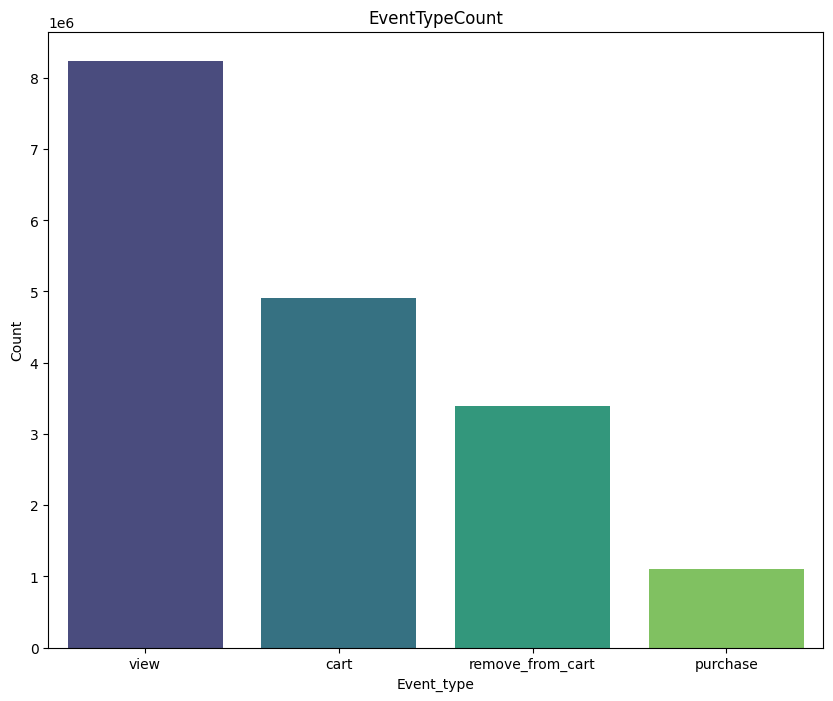

In [ ]:
# event_type의 횟수를 계산
event_counts = df['event_type'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')
plt.title('EventTypeCount')
plt.xlabel('Event_type')
plt.ylabel('Count')
plt.show()

###4. category_id

In [ ]:
len_category = len(df['category_id'].unique())
print(f'카테고리 종류 총 {len_category}개')

카테고리 종류 총 626개


In [ ]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
brand           7514027
price                 0
user_id               0
user_session       4046
dtype: int64

In [ ]:
df[df['user_session'].isnull()].head(20)

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
22936,2019-10-01 07:39:05+00:00,cart,5727536,1487580000000000000,NaN,3,555532580,NaN
22975,2019-10-01 07:39:29+00:00,cart,5699811,1487580000000000000,NaN,3,555532580,NaN
53702,2019-10-01 11:29:29+00:00,cart,5873252,1487580000000000000,NaN,4,401104846,NaN
61974,2019-10-01 12:34:50+00:00,cart,5861726,1487580000000000000,NaN,7,555627944,NaN
65533,2019-10-01 13:06:35+00:00,cart,5665855,1487580000000000000,irisk,2,555638076,NaN
89414,2019-10-01 16:45:00+00:00,cart,5793261,1487580000000000000,NaN,22,555713414,NaN
153848,2019-10-02 02:40:47+00:00,cart,5875273,1487580000000000000,NaN,7,555838430,NaN
194481,2019-10-02 08:09:32+00:00,cart,5686080,1487580000000000000,NaN,1,415151266,NaN
194495,2019-10-02 08:09:35+00:00,cart,5686080,1487580000000000000,NaN,1,415151266,NaN
223242,2019-10-02 10:46:31+00:00,cart,5866960,1487580000000000000,sunuv,56,451061620,NaN


In [ ]:
# 'user_session' null인 행 따로 모아놓음
session_null_df = df[df['user_session'].isnull()]

# category_id의 갯수 세기
category_count = session_null_df['category_id'].value_counts()

# 갯수 100개가 넘는 category_id 찾기
result = category_count[category_count > 100].index.tolist()

len(result) # user_id가 null인 행 100개가 넘는 category_id 총 8개

5

In [ ]:
category_count = session_null_df['category_id']
top10_category_count = category_count.head(10).value_counts().sort_values(ascending=False)

In [ ]:
session_null_df['event_type'].unique() # null 값 中 구매 행은 존재하지 않음

array(['cart', 'remove_from_cart', 'view'], dtype=object)

In [ ]:
session_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4046 entries, 22936 to 17634400
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   event_time    4046 non-null   object 
 1   event_type    4046 non-null   object 
 2   product_id    4046 non-null   int64  
 3   category_id   4046 non-null   float64
 4   brand         2590 non-null   object 
 5   price         4046 non-null   float64
 6   user_id       4046 non-null   int64  
 7   user_session  0 non-null      object 
dtypes: float64(2), int64(2), object(4)
memory usage: 284.5+ KB


## 코호트 분석

In [ ]:
# '구매' 데이터 한정하여 분석
cohort_df = df[df['event_type'] == 'purchase']

In [ ]:
# event_time 컬럼 날짜 형식 변환
cohort_df['event_time'] = pd.to_datetime(cohort_df['event_time'])

<ipython-input-31-c62e8cde1238>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df['event_time'] = pd.to_datetime(cohort_df['event_time'])


In [ ]:
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096948 entries, 202 to 17638901
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype              
---  ------          --------------    -----              
 0   event_time      1096948 non-null  datetime64[ns, UTC]
 1   event_type      1096948 non-null  object             
 2   product_id      1096948 non-null  int64              
 3   category_id     1096948 non-null  float64            
 4   brand           626093 non-null   object             
 5   price           1096948 non-null  float64            
 6   user_id         1096948 non-null  int64              
 7   user_session    1096948 non-null  object             
 8   First_Purchase  1096948 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(4)
memory usage: 83.7+ MB


In [ ]:
cohort_df.sample(3)

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,First_Purchase
2389034,2019-11-10 16:22:35+00:00,purchase,5855129,1487580005268456192,NaN,16,246568802,6cecc5ff-8f9d-4eff-8474-3b97dbc1f587,2019-11-10 16:22:35+00:00
17378400,2020-02-28 05:39:46+00:00,purchase,5788426,1487580008758116352,NaN,3,621302517,c140c02c-d150-4f7e-9259-8e57cc1730fa,2020-02-28 05:39:46+00:00
14313427,2020-02-06 08:34:46+00:00,purchase,5560754,1487580006300255232,strong,194,610781622,913a6b3b-7eba-4473-b74b-ab4f3f6ec2e3,2020-02-06 08:34:46+00:00


In [ ]:
cohort_df.groupby(['user_id'])['event_time'].transform('min')

202        2019-10-01 00:06:35+00:00
204        2019-10-01 00:06:35+00:00
205        2019-10-01 00:06:35+00:00
206        2019-10-01 00:06:35+00:00
207        2019-10-01 00:06:35+00:00
                      ...           
17638684   2020-02-29 23:46:01+00:00
17638898   2020-02-29 23:54:44+00:00
17638899   2020-02-29 23:54:44+00:00
17638900   2020-02-29 23:54:44+00:00
17638901   2020-02-29 23:54:44+00:00
Name: event_time, Length: 1096948, dtype: datetime64[ns, UTC]

In [ ]:
cohort_df['First_Purchase'] = cohort_df.groupby(['user_id'])['event_time'].transform('min')

<ipython-input-35-50c7eee1aac7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df['First_Purchase'] = cohort_df.groupby(['user_id'])['event_time'].transform('min')


In [ ]:
cohort_df[['user_id', 'event_time','First_Purchase']].sample(5)
# 샘플 행으로 구매 당시 시간과 해당 고객이 처음으로 주문한 날짜 파악

,user_id,event_time,First_Purchase
15308551,614040081,2020-02-12 21:40:15+00:00,2020-02-12 21:40:15+00:00
4504757,565148920,2019-11-24 09:08:31+00:00,2019-11-24 09:08:31+00:00
1234764,303835039,2019-11-02 16:01:05+00:00,2019-11-02 16:01:05+00:00
5601754,551331613,2019-11-30 14:17:16+00:00,2019-11-30 14:17:16+00:00
5064265,576929442,2019-11-27 19:22:47+00:00,2019-11-27 19:22:47+00:00


In [ ]:
different_rows = cohort_df[cohort_df['event_time'] != cohort_df['First_Purchase']].shape[0]
total_rows = cohort_df.shape[0]

different_percentage = (different_rows / total_rows) * 100

print(f'재구매가 이루어진 비율: {different_percentage: .2f}%')

재구매가 이루어진 비율:  32.21%


In [ ]:
# year_dff
year_diff = cohort_df['event_time'].dt.year - cohort_df['First_Purchase'].dt.year
# month_dff
month_diff = cohort_df['event_time'].dt.month - cohort_df['First_Purchase'].dt.month
month_diff.value_counts()

 0     841045
 1      88630
-10     69363
-9      53705
-11     21107
-8      11749
 2      11349
Name: count, dtype: int64

In [ ]:
year_diff.value_counts()

0    941024
1    155924
Name: count, dtype: int64

In [ ]:
cohort_df['cohort_index'] = (year_diff * 12) + (month_diff + 1)

<ipython-input-40-7fd0b2a0902d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df['cohort_index'] = (year_diff * 12) + (month_diff + 1)


In [ ]:
cohort_df['cohort_index'].value_counts() # 구매 월 차이를 알아볼 수 있음

cohort_index
1    841045
2    109737
3     80712
4     53705
5     11749
Name: count, dtype: int64

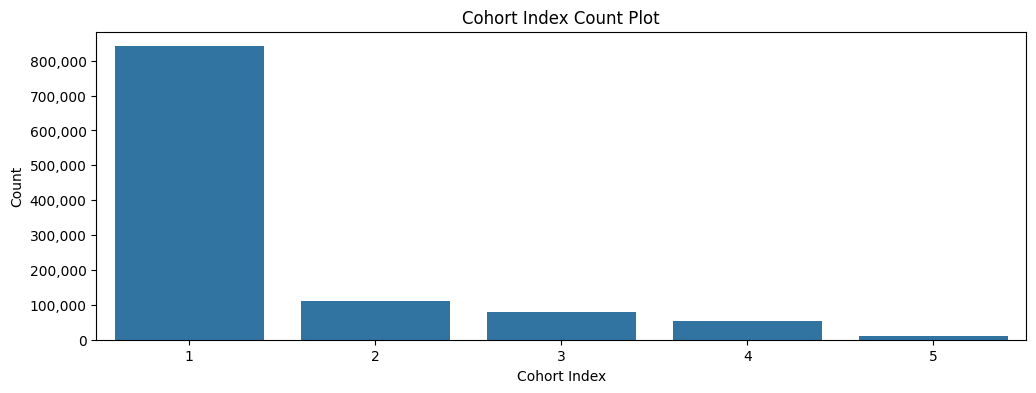

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data=cohort_df, x='cohort_index')

# y축의 눈금 조정
plt.yscale('linear')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.xlabel('Cohort Index')
plt.ylabel('Count')
plt.title('Cohort Index Count Plot')
plt.show()

In [ ]:
cohort_df['First_Purchase_YM'] = cohort_df['First_Purchase'].astype(str).str[:7]

<ipython-input-43-b06253cd6a8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df['First_Purchase_YM'] = cohort_df['First_Purchase'].astype(str).str[:7]


In [ ]:
cohort_count = cohort_df.groupby(['First_Purchase_YM','cohort_index'])['user_id'].nunique().unstack()
# 1 = 해당 달에 처음 구매한 고객의 수 (신규유치고객)
cohort_count

cohort_index,1,2,3,4,5
First_Purchase_YM,,,,,
2019-10,6401,1280,908,924,780
2019-11,30244,3801,4035,3188,NaN
2019-12,20904,2024,1570,NaN,NaN
2020-01,21237,1981,NaN,NaN,NaN
2020-02,18240,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='First_Purchase_YM'>

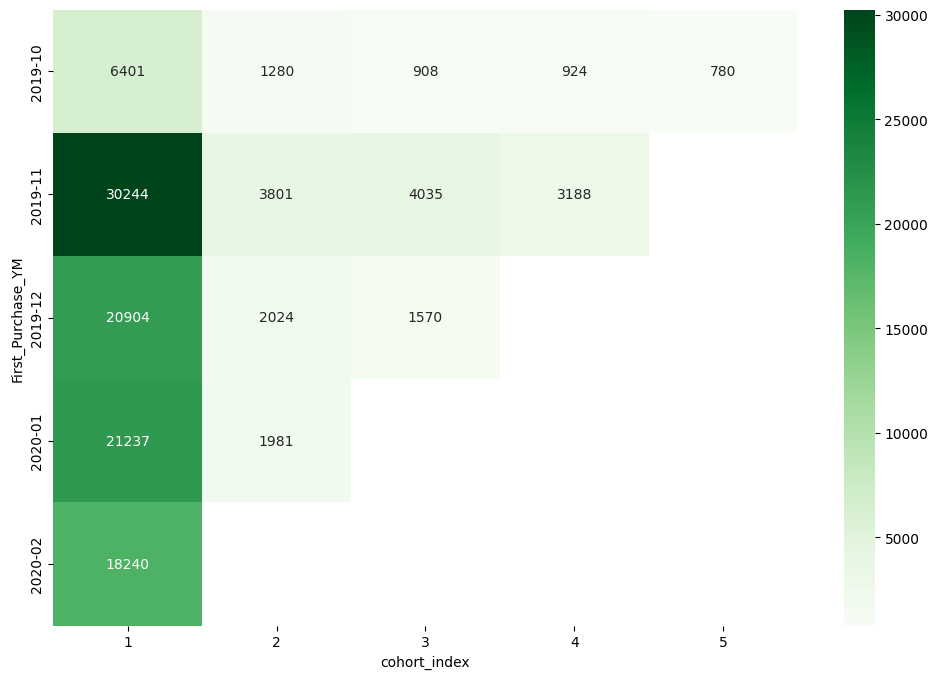

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cohort_count, cmap='Greens', annot=True, fmt=".0f") # 잔존 빈도

<Axes: title={'center': 'Monthly New Customer Count'}, xlabel='First_Purchase_YM'>

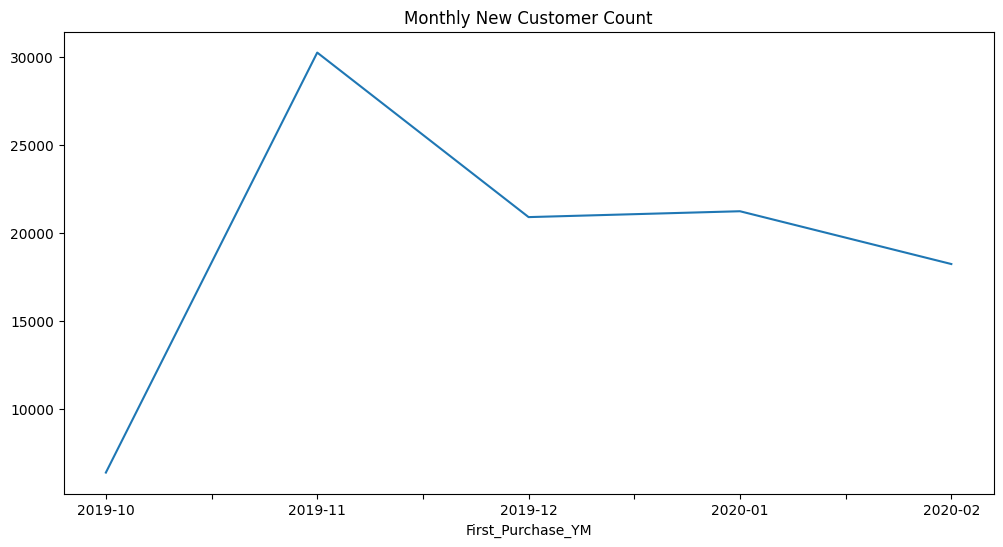

In [ ]:
cohort_count[1].plot(figsize=(12, 6), rot=0, title='Monthly New Customer Count')

<Axes: title={'center': 'Monthly New Customer Count'}, xlabel='First_Purchase_YM'>

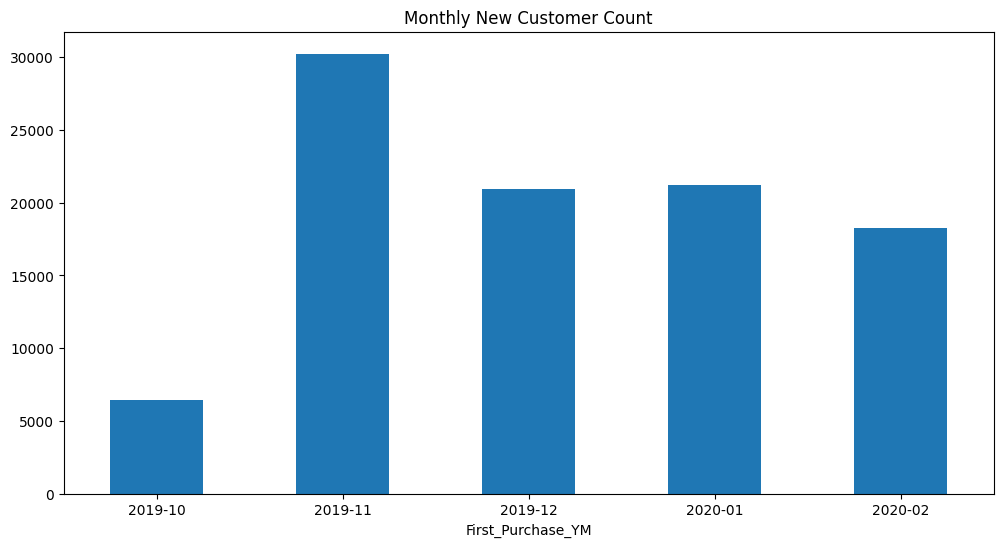

In [ ]:
cohort_count[1].plot(kind='bar', figsize=(12, 6), rot=0,title='Monthly New Customer Count') # rot = 축 이름 가지런히 놓는 방법

### 잔존율

In [ ]:
cohort_count

cohort_index,1,2,3,4,5
First_Purchase_YM,,,,,
2019-10,6401,1280,908,924,780
2019-11,30244,3801,4035,3188,NaN
2019-12,20904,2024,1570,NaN,NaN
2020-01,21237,1981,NaN,NaN,NaN
2020-02,18240,NaN,NaN,NaN,NaN


In [ ]:
# 소수점 이하 값까지 표시하기 위해 소수점 자리수를 설정
pd.options.display.float_format = '{:.4f}'.format

cohort_norm = cohort_count.div(cohort_count[1], axis=0)
cohort_norm

cohort_index,1,2,3,4,5
First_Purchase_YM,,,,,
2019-10,1.0000,0.2000,0.1419,0.1444,0.1219
2019-11,1.0000,0.1257,0.1334,0.1054,NaN
2019-12,1.0000,0.0968,0.0751,NaN,NaN
2020-01,1.0000,0.0933,NaN,NaN,NaN
2020-02,1.0000,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='First_Purchase_YM'>

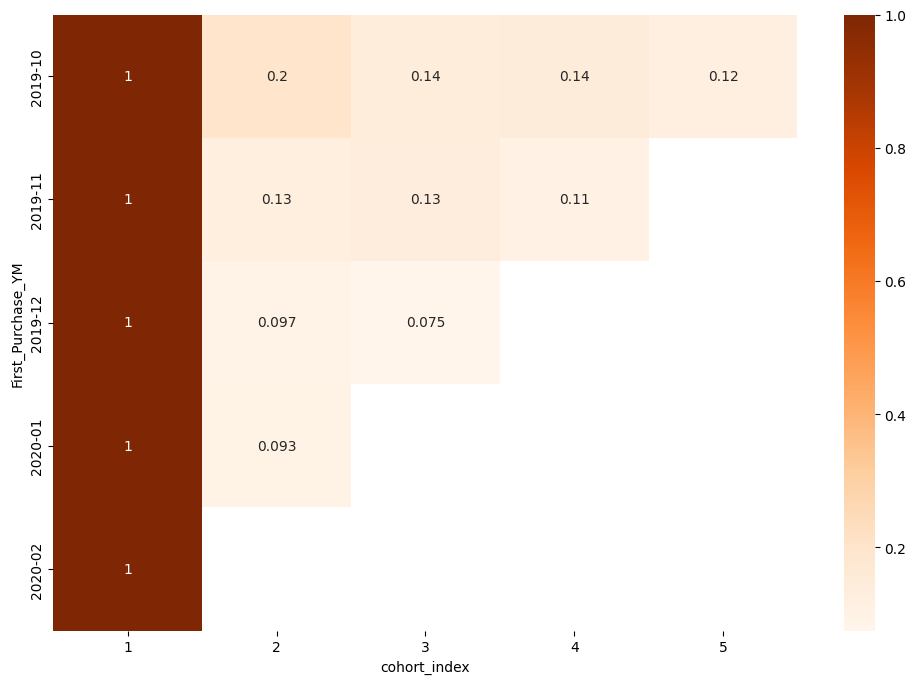

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cohort_norm, cmap='Oranges', annot=True)

### 고객별 매출액

In [ ]:
cohort_df.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,First_Purchase,cohort_index,First_Purchase_YM
202,2019-10-01 00:06:35+00:00,purchase,5619862,1487580000000000000.0000,runail,5.3200,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00,1,2019-10
204,2019-10-01 00:06:35+00:00,purchase,5619866,1487580000000000000.0000,runail,2.8600,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00,1,2019-10
205,2019-10-01 00:06:35+00:00,purchase,5696184,1487580000000000000.0000,runail,2.3800,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00,1,2019-10
206,2019-10-01 00:06:35+00:00,purchase,5706784,1487580000000000000.0000,runail,4.4400,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00,1,2019-10
207,2019-10-01 00:06:35+00:00,purchase,5723503,1487580000000000000.0000,runail,2.6200,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00,1,2019-10


In [ ]:
cohort_total_price = cohort_df.groupby(["First_Purchase_YM","cohort_index"])['price'].sum().unstack()
# 코호트 인덱스 값에 따른 매출액 합계값
cohort_total_price

cohort_index,1,2,3,4,5
First_Purchase_YM,,,,,
2019-10,274529.2900,98534.7000,55385.9000,66974.0700,58393.8700
2019-11,1432974.2700,199995.6200,250241.5100,194847.8200,NaN
2019-12,822783.0100,100030.8700,79819.6000,NaN,NaN
2020-01,905447.7700,106354.9500,NaN,NaN,NaN
2020-02,767952.3400,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='First_Purchase_YM'>

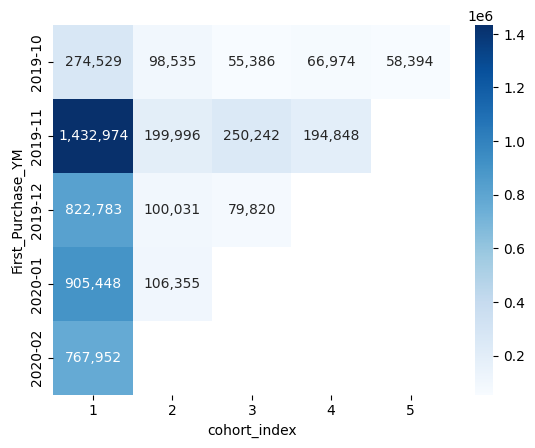

In [ ]:
sns.heatmap(cohort_total_price, cmap='Blues', annot=True, fmt=',.0f')

In [ ]:
!pip install retentioneering
import retentioneering
from retentioneering.eventstream import Eventstream

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.5/915.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 98.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.9/426.9 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 23.6 MB/s eta 

In [ ]:
df.rename(columns={'event_type':'event','event_time':'timestamp'},inplace=True)

In [ ]:
stream = Eventstream(df, user_sample_size=0.1, user_sample_seed=42)

stream.describe()

value
category          metric                                       
overall           unique_users                           143504
                  unique_events                               6
                  eventstream_start   2019-10-01 00:01:25+00:00
                  eventstream_end     2020-02-29 23:59:59+00:00
                  eventstream_length          151 days 23:58:34
path_length_time  mean                          7 days 07:45:27
                  std                          21 days 19:46:38
                  median                        0 days 00:00:17
                  min                           0 days 00:00:00
                  max                         151 days 23:24:49
path_length_steps mean                                  14.2100
                  std                                   70.2800
                  median                                 4.0000
                  min                                         3
                  max                                      9422

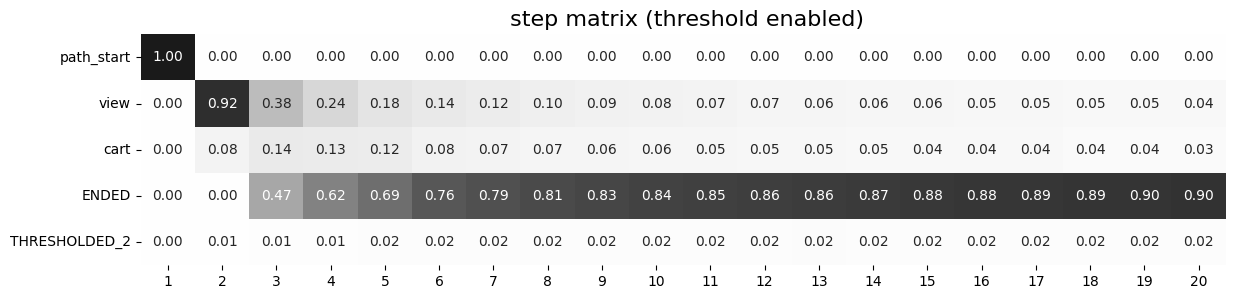

In [ ]:
stream.step_matrix(threshold=0.02)
# threshold는 0.02보다 최댓값이 낮은 단계별 이벤트는 제외하고 기록하는 것을 의미
## 그래서 remove in cart 단계는 비율이 0.02보다 낮아 THRESHOLDED_2 로 넘어간 것

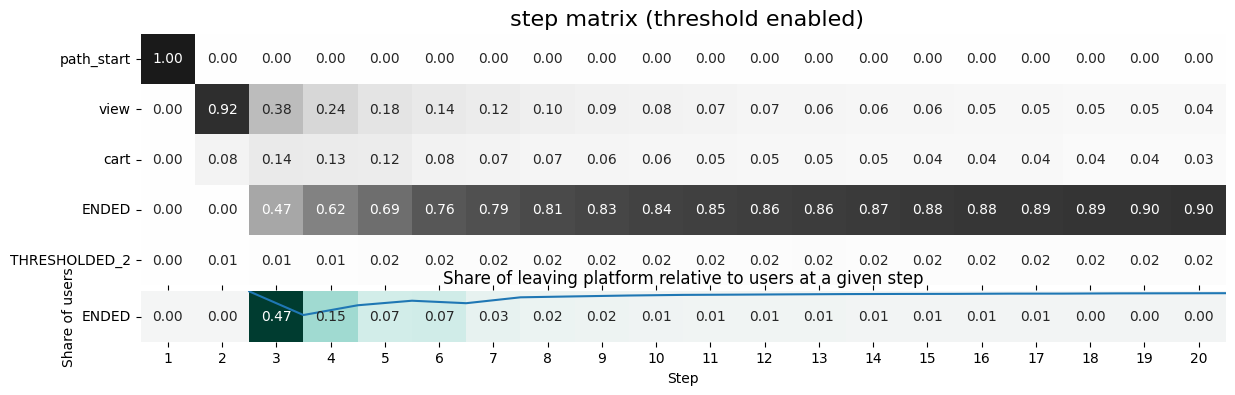

In [ ]:
sm = stream.step_matrix(threshold=0.05, targets=['ENDED'])

ended_on_step = sm.values[1].loc["ENDED"]
users_on_step = 1 - sm.values[0].loc["ENDED"].shift(1)
ended_share = ended_on_step / users_on_step.dropna()

plt.title('Share of leaving platform relative to users at a given step')
plt.xlabel('Step')
plt.ylabel('Share of users')
plt.plot(ended_share)
plt.show()



```
# This is formatted as code
```

## RFM 분석

#### 전처리

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/ecommerce_data_1st')

In [ ]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17639017 entries, 0 to 17639016
Data columns (total 8 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_type    object             
 2   product_id    int64              
 3   category_id   float64            
 4   brand         object             
 5   price         float64            
 6   user_id       int64              
 7   user_session  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(3)
memory usage: 1.1+ GB


In [ ]:
df.shape

(17639017, 8)

In [ ]:
df.head(2)

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580000000000000,runail,3,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580000000000000,runail,3,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885


In [ ]:
df = df.iloc[:, [6,7,0,1,2,3,4,5]] # 데이터 내 컬럼 순서 변경
df.head(3)

,user_id,user_session,event_time,event_type,product_id,category_id,brand,price
0,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 00:00:00+00:00,cart,5773203,1487580000000000000,runail,3
1,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 00:00:03+00:00,cart,5773353,1487580000000000000,runail,3
2,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:07+00:00,cart,5881589,2151190000000000000,lovely,13


In [ ]:
df.describe(include='all')

,user_id,user_session,event_time,event_type,product_id,category_id,brand,price
count,17639017,17634971,17639017,17639017,17639017,17639017,10124990,17639017
unique,NaN,3886499,NaN,4,NaN,NaN,272,NaN
top,NaN,74206ba1-c863-4760-bbdc-b11777059e46,NaN,view,NaN,NaN,runail,NaN
freq,NaN,5411,NaN,8237769,NaN,NaN,1325155,NaN
mean,525320377,NaN,2019-12-26 03:57:24.428902912+00:00,NaN,5488247,1556053471167008000,NaN,9
min,465496,NaN,2019-10-01 00:00:00+00:00,NaN,3752,1487580000000000000,NaN,0
25%,486620071,NaN,2019-11-23 18:17:04+00:00,NaN,5726172,1487580005671109376,NaN,2
50%,556045950,NaN,2019-12-26 09:16:55+00:00,NaN,5811800,1487580008246412288,NaN,4
75%,584777782,NaN,2020-01-30 07:21:59+00:00,NaN,5859199,1487580013506068736,NaN,7
max,622090237,NaN,2020-02-29 23:59:59+00:00,NaN,5932595,2242903426784559104,NaN,328


In [ ]:
# user_id 있는 행
df_valid = df[df['user_id'].notnull() & (df['price'] > 0) & (df['event_type'] == 'purchase')]
df_valid.shape

(1096947, 8)

- **약 110만개 행**

In [ ]:
monetary_df = df_valid.groupby('user_id')['price'].sum().reset_index()
monetary_df.head()

,user_id,price
0,9794320,13
1,10079204,26
2,10280338,178
3,12055855,17
4,12936739,30


In [ ]:
monetary_df.describe(include='all')

,user_id,price
count,97026,97026
mean,531096145,56
std,88320873,83
min,9794320,0
25%,497060962,16
50%,564605328,33
75%,590223547,61
max,622073202,2857


In [ ]:
monetary_df[monetary_df['price'] > 2000]

,user_id,price
262,150318419,2857
1613,247216055,2570
18637,469299888,2412
19009,471197852,2672
32613,531900924,2751
45010,557790271,2716
47158,562167663,2243
48771,565036131,2556
56342,572081598,2213


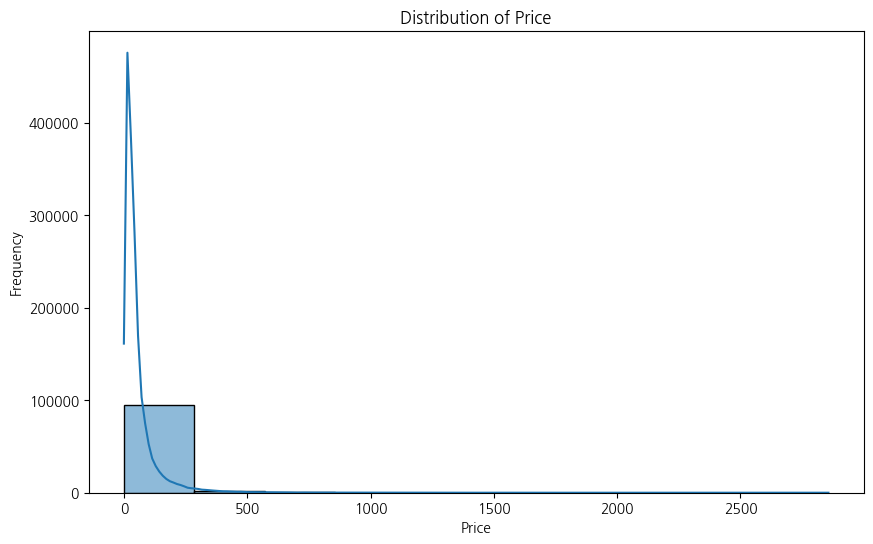

In [ ]:
# price 컬럼의 값의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
sns.histplot(monetary_df['price'], bins=10, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_valid.duplicated()
df_valid[df_valid.duplicated(keep="first")].head(10)

,user_id,user_session,event_time,event_type,product_id,category_id,brand,price
12975,486637085,205bec28-f4a8-4c83-a239-ad4061d9ec1e,2019-10-01 06:07:38+00:00,purchase,5743974,1487580000000000000,italwax,2
18102,483780690,c7fdeffd-21ec-72c7-3a28-0c38960edc5c,2019-10-01 06:52:39+00:00,purchase,5823288,1487580000000000000,runail,2
29369,474393926,1384092e-8aa7-4431-bb8b-d06e6f8f2cbb,2019-10-01 08:35:09+00:00,purchase,5804051,1487580000000000000,bluesky,4
34950,450205849,a6f2286a-f34d-452d-aa19-39ae77dc4926,2019-10-01 09:19:48+00:00,purchase,5803966,1487580000000000000,bluesky,4
35198,550049808,130d5b4c-98a0-493f-b2c4-384e7fff533c,2019-10-01 09:22:19+00:00,purchase,5749199,1487580000000000000,italwax,2
57942,439462386,3ec08964-1d01-431a-9619-5861dfb6099a,2019-10-01 12:03:51+00:00,purchase,5760789,1487580000000000000,runail,3
69529,345161926,34d7a36b-a705-4b20-999a-77fca132918d,2019-10-01 13:38:19+00:00,purchase,5854314,1487580000000000000,runail,2
107613,307510697,2fefa203-5a5b-4f7a-a24f-a43516d9df67,2019-10-01 18:39:37+00:00,purchase,5804371,1487580000000000000,bluesky,4
121503,555428551,ada0c427-209e-4f89-acca-b4f19fdbf7ff,2019-10-01 20:03:33+00:00,purchase,5743974,1487580000000000000,italwax,2
289009,556091079,384466c8-207f-4594-bc13-03c260bc6ee3,2019-10-02 17:14:22+00:00,purchase,5723515,1487580000000000000,runail,3


In [ ]:
df_valid[df_valid.duplicated(keep='first')].sort_values(['user_id','event_time']).head(40)

,user_id,user_session,event_time,event_type,product_id,category_id,brand,price
16678267,72655920,c5643d68-0641-4f40-9f1e-7019a49ec320,2020-02-23 10:16:20+00:00,purchase,5738998,1487580013858390528,concept,1
10742445,150318419,e3e25ff3-7338-4e28-a2f0-6aa1e33c37d2,2020-01-13 13:05:12+00:00,purchase,5763933,1487580005671109376,masura,16
1395378,168757641,219244d6-4dc2-4398-8f10-a496293c8ff4,2019-11-03 20:48:14+00:00,purchase,5747406,1487580005671109376,masura,6
1957066,172974485,15c8a6d8-cad6-45c3-aa38-d0b39b8a0c9d,2019-11-07 16:01:03+00:00,purchase,5809303,1487580007675986944,bpw.style,1
13867237,172974485,15c8a6d8-cad6-45c3-aa38-d0b39b8a0c9d,2020-02-03 13:21:41+00:00,purchase,5809303,1487580007675986944,bpw.style,1
8497712,230911992,95ed4f14-39ed-45ed-b2d7-d800219127b2,2019-12-23 11:02:56+00:00,purchase,5804463,1487580005461394176,bluesky,4
8501471,230911992,e259d064-91dc-42e6-88c2-e5fa10ad3386,2019-12-23 11:34:04+00:00,purchase,5804463,1487580005461394176,bluesky,4
1132644,231647424,4f745cec-dd50-76fe-6c40-4806c8e6098d,2019-11-01 17:21:29+00:00,purchase,5896509,1487580008313521152,concept,6
4971973,233100987,7cbeebfb-71e3-44cd-8bc6-76ca235074e2,2019-11-27 07:49:21+00:00,purchase,5738759,1487580013581566208,kapous,3
10417585,235267883,8fc524b5-8349-4abf-8759-779438cbbfb8,2020-01-11 08:36:14+00:00,purchase,5803898,1487580005461394176,bluesky,4


In [ ]:
df_valid['event_time'].info()

<class 'pandas.core.series.Series'>
Index: 1096947 entries, 202 to 17638901
Series name: event_time
Non-Null Count    Dtype              
--------------    -----              
1096947 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 16.7 MB


In [ ]:
# 마지막 영업일 구매일자를 1로 지정하기 위한 방법
import datetime as dt
last_timestamp = df_valid['event_time'].max() + dt.timedelta(days=1) # event_time 행에서 가장 마지막 구매 일자 + 1일 더한 값. 즉, 마지막 구매일자는 1로 지정되고, 그 이후로 차례로 2, 3, 4일로 지정됨
last_timestamp

Timestamp('2020-03-01 23:54:44+0000', tz='UTC')

### 고객별 R F M 값 구하기

In [ ]:
# Recency: 최근 거래 기준일(last_timestamp)과 고객별 최근 구매 날짜(x.max())와 차이
rfm = df_valid.groupby('user_id').agg({"event_time" : lambda x :(last_timestamp -  x.max()).days,
                                 'user_session' : 'nunique',
                                 'price' : 'sum'
                                 })
# 고객 id 별로 몇일전에 구매했는지 파악 (1이면 오늘)

In [ ]:
rfm = rfm.rename(columns={'event_time':'Recency',
                    'user_session':'Frequency',
                    'price':'MonetaryValue'})
rfm.sample(3)

,Recency,Frequency,MonetaryValue
user_id,,,
386491215,2,31,1157
493909494,88,1,56
577325493,92,1,3


In [ ]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,97026,97026,97026
mean,62,1,56
std,40,1,83
min,1,1,0
25%,28,1,16
50%,58,1,33
75%,94,1,61
max,152,95,2857


In [ ]:
percentage = len(rfm[rfm["Frequency"] > 2]) / len(rfm) * 100
print(f"Frequency 1, 2번이 아닌 비율 {percentage:.3f}%")

Frequency 1, 2번이 아닌 비율 7.658%


> Frequency 1번인 그룹으로만 따로 나누는 것도 하나의 방법

In [ ]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,97026,97026,97026
mean,62,1,56
std,40,1,83
min,1,1,0
25%,28,1,16
50%,58,1,33
75%,94,1,61
max,152,95,2857


In [ ]:
# rfm.to_csv('/content/drive/My Drive/RFM_1.csv')

<Axes: >

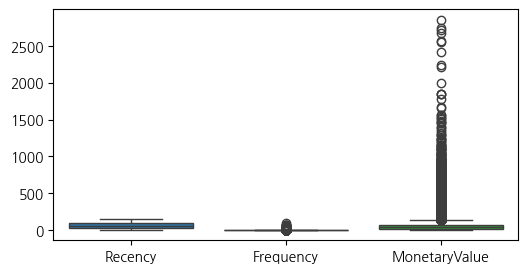

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(rfm)

<Axes: xlabel='Recency'>

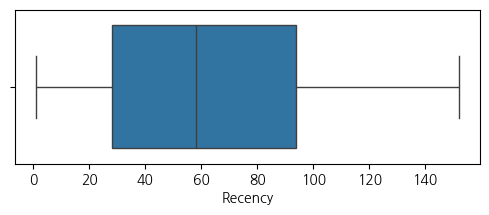

In [ ]:
plt.figure(figsize=(6, 2))
sns.boxplot(data=rfm, x='Recency')

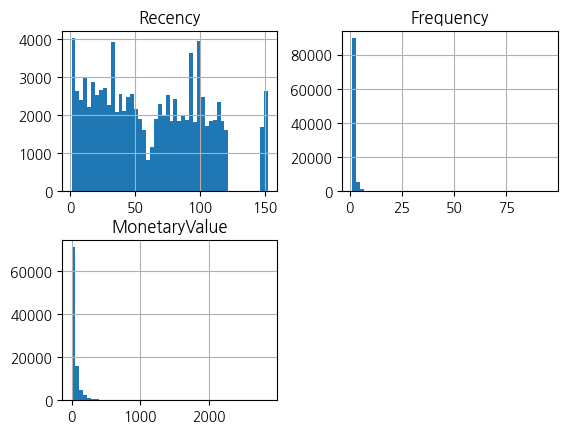

In [ ]:
rfm.hist(bins=50); # 구간을 더 잘게 나누어 확인

### RFM 모형

> pd.cut : 동일한 구간으로 나누는 것 (bins히스토, 절대평가)

> pd.qcut : 동일한 갯수로 나누는 것 (4분위수, 상대평가)

In [ ]:
# r_labels : 최근일수록 점수 high, 오래될수록 점수 low 산정
r_labels = list(range(5, 0, -1))
# m_labels, f_labels: 높을수록 점수 high
f_labels = [1, 2, 3, 4]  # Frequency: 1, 2, 3~5, 6+
m_labels = list(range(1, 6))
cut_size = 5

In [ ]:
rfm

,Recency,Frequency,MonetaryValue
user_id,,,
9794320,97,1,13
10079204,116,1,26
10280338,11,5,178
12055855,72,1,17
12936739,44,1,30
...,...,...,...
622065819,1,1,20
622066161,1,1,13
622067983,1,1,66


In [ ]:
r_qcut = pd.qcut(x=rfm['Recency'], q=cut_size, labels=r_labels, duplicates='drop')
f_cut = rfm['Frequency'].apply(lambda x: 1 if x == 1 else (2 if x == 2 else (3 if 3 <= x <= 5 else 4))) # 방문 빈도가 1, 2인 비율이 압도적 -> frequency는 q_cut말고 수동 조정
m_qcut = pd.qcut(x=rfm['MonetaryValue'], q=cut_size, labels=m_labels, duplicates='drop')

In [ ]:
not_one = rfm[rfm['Frequency'] != 1].shape[0]
print(not_one)

19669


In [ ]:
rfm = rfm.assign(R=r_qcut, F=f_cut, M=m_qcut)
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M
user_id,,,,,,
9794320,97,1,13,2,1,1
10079204,116,1,26,1,1,3


In [ ]:
#rfm segment
rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
user_id,,,,,,,
9794320,97,1,13,2,1,1,211
10079204,116,1,26,1,1,3,113
10280338,11,5,178,5,3,5,535
12055855,72,1,17,3,1,2,312
12936739,44,1,30,4,1,3,413
...,...,...,...,...,...,...,...
622065819,1,1,20,5,1,2,512
622066161,1,1,13,5,1,1,511
622067983,1,1,66,5,1,4,514


In [ ]:
# rfm score (고객별 점수)
rfm['RFM_score'] = rfm[['R','F','M']].astype(int).sum(axis=1)
rfm.head(3)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
user_id,,,,,,,,
9794320,97,1,13,2,1,1,211,4
10079204,116,1,26,1,1,3,113,5
10280338,11,5,178,5,3,5,535,13


In [ ]:
len(rfm['RFM_segment'].unique())

82

<Axes: xlabel='RFM_segment', ylabel='RFM_score'>

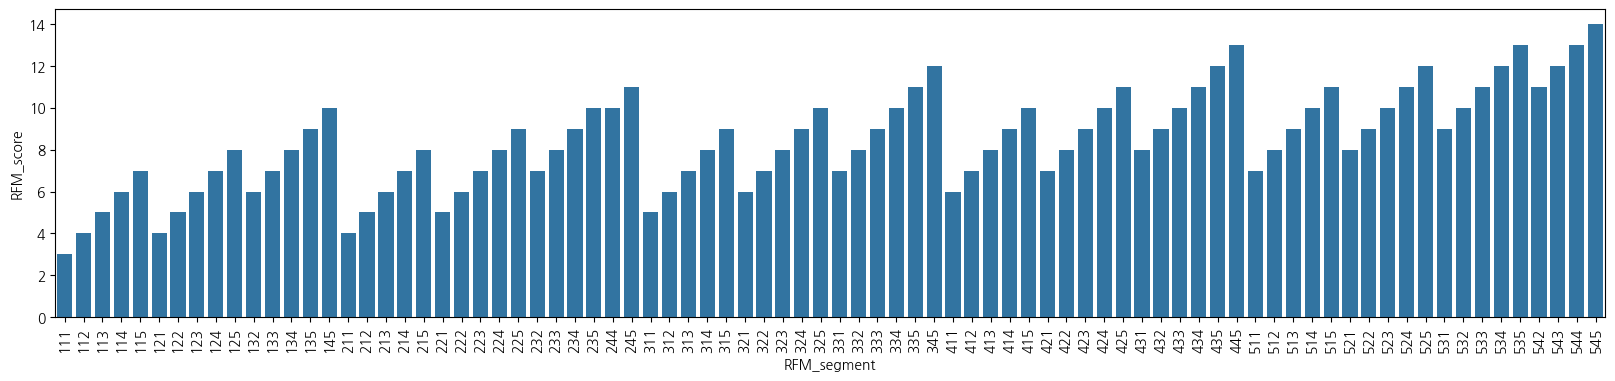

In [ ]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values('RFM_segment'), x="RFM_segment", y='RFM_score')

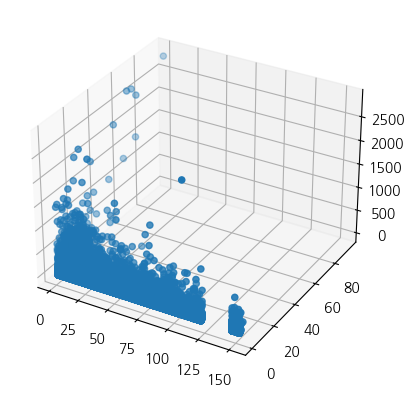

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['Recency'], rfm['Frequency'], rfm['MonetaryValue']) # 이상치, 특이한 고객 찾을 때는 이방법이 더 좋을 수 있음
# But 몰려있기에 고객별로 정확한 파악이 어려워 segment를 나눠줌

In [ ]:
import plotly.express as px

color_map = px.colors.qualitative.Light24[:82]  # 82가지 색상 생성

fig = px.scatter_3d(rfm, x='Recency', y='Frequency', z='MonetaryValue', title='3D Scatter plot of RFM Segments',color='RFM_segment', color_discrete_map=color_map,
                    labels={'Recency': 'R', 'Frequency': 'F', 'MonetaryValue': 'M'})


fig.show()


TypeError: list indices must be integers or slices, not str

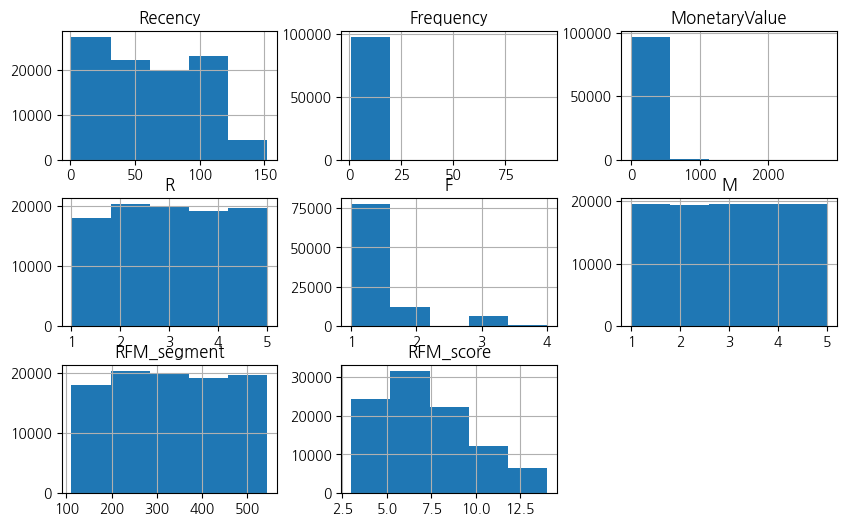

In [ ]:
rfm.astype(int).hist(bins=5, figsize=(10,6));
# q_cut을 진행했기 때문에 두번째 행 처럼 비슷한 비율로 분포되게 할 수 있음

In [ ]:
rfm.groupby('RFM_score').agg({'Recency':'mean',
                              'Frequency':'mean',
                              'MonetaryValue':['mean', 'sum']
                              }).style.background_gradient().format("{:,.0f}")
# Ex) RFM_score 10점일때, 31일 만에 주문하고, 약 2번 주문했다

#### qcut을 통한 고객군 나누기

In [ ]:
rfm['RFM_class'] = pd.qcut(x=rfm['RFM_score'], q=4, labels=['blonze', 'silver','gold', 'platinum'])
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
9794320,97,1,13,2,1,1,211,4,blonze
10079204,116,1,26,1,1,3,113,5,blonze
10280338,11,5,178,5,3,5,535,13,platinum
12055855,72,1,17,3,1,2,312,6,silver
12936739,44,1,30,4,1,3,413,8,gold
...,...,...,...,...,...,...,...,...,...
622065819,1,1,20,5,1,2,512,8,gold
622066161,1,1,13,5,1,1,511,7,silver
622067983,1,1,66,5,1,4,514,10,platinum


In [ ]:
rfm.groupby('RFM_class')['RFM_score'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
blonze,24417,4,1,3,4,4,5,5
silver,31518,7,0,6,6,7,7,7
gold,22333,8,0,8,8,8,9,9
platinum,18758,11,1,10,10,11,12,14


1. 브론즈 3~5
2. 실버 6~7
3. 골드 8~9
4. 플래티넘 10~14

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

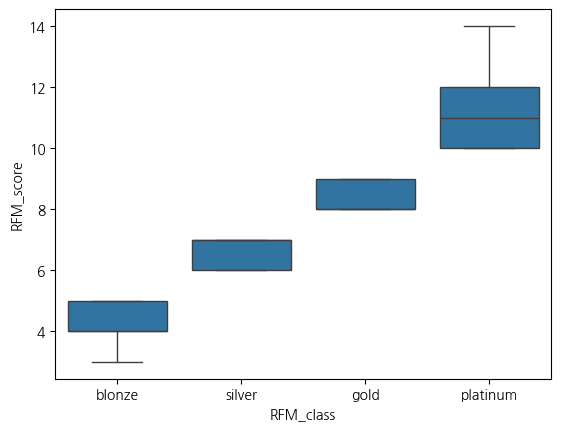

In [ ]:
sns.boxplot(data=rfm, x='RFM_class', y='RFM_score')

<Axes: xlabel='R', ylabel='RFM_score'>

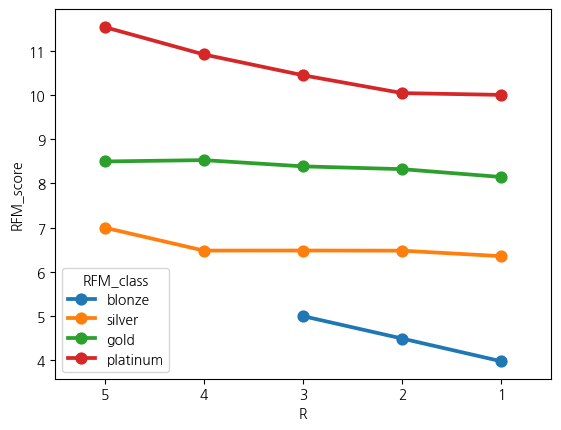

In [ ]:
sns.pointplot(data=rfm, x='R', y='RFM_score', hue='RFM_class')

<Axes: xlabel='F', ylabel='RFM_score'>

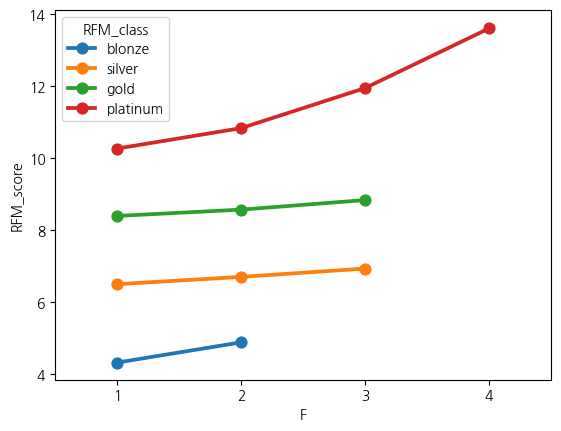

In [ ]:
sns.pointplot(data=rfm, x='F', y='RFM_score', hue='RFM_class')

<Axes: xlabel='M', ylabel='RFM_score'>

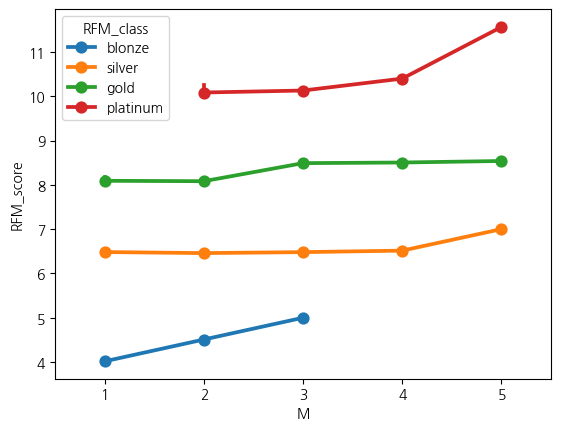

In [ ]:
sns.pointplot(data=rfm, x='M', y='RFM_score', hue='RFM_class')

In [ ]:
rfm.columns

Index(['Recency', 'Frequency', 'MonetaryValue', 'R', 'F', 'M', 'RFM_segment',
       'RFM_score', 'RFM_class'],
      dtype='object')

In [ ]:
rfm.groupby("RFM_class").agg({'Recency':'mean',
                              'Frequency':'mean',
                              'MonetaryValue':['mean','sum','count']})

Recency Frequency MonetaryValue               
             mean      mean          mean     sum  count
RFM_class                                               
blonze         99         1            16  402282  24417
silver         67         1            34 1078884  31518
gold           45         1            59 1308947  22333
platinum       25         3           140 2624153  18758

In [ ]:
rfm.groupby("RFM_class").agg({'Recency':'mean',
                              'Frequency':'mean',
                              'MonetaryValue':['mean','sum','count']
                              }).style.background_gradient().format('{:,.0f}')

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97026 entries, 9794320 to 622073202
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        97026 non-null  int64   
 1   Frequency      97026 non-null  int64   
 2   MonetaryValue  97026 non-null  float64 
 3   R              97026 non-null  category
 4   F              97026 non-null  int64   
 5   M              97026 non-null  category
 6   RFM_segment    97026 non-null  object  
 7   RFM_score      97026 non-null  int64   
 8   RFM_class      97026 non-null  category
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 5.5+ MB


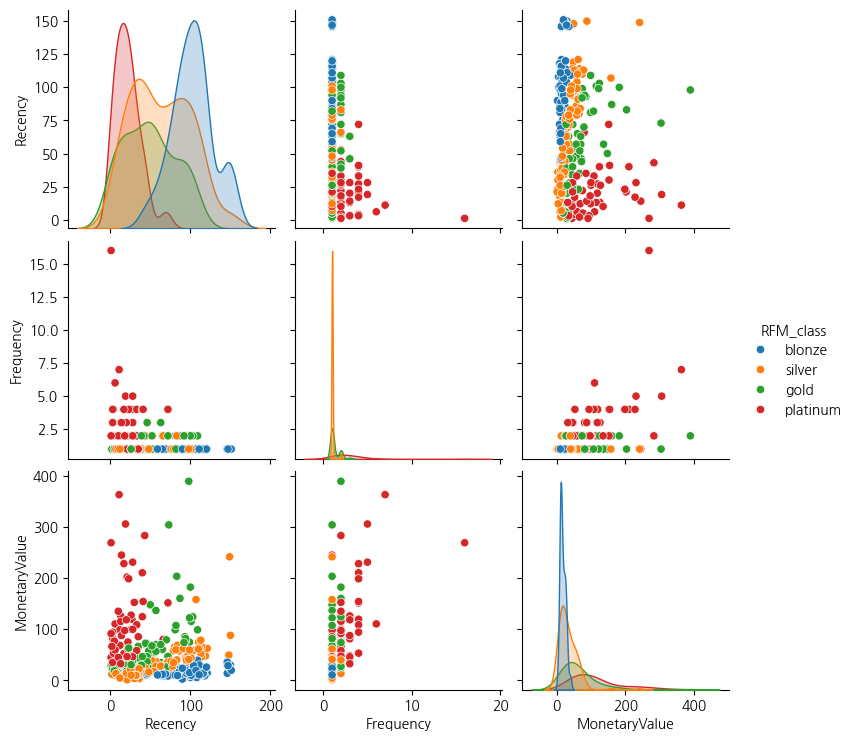

In [ ]:
sns.pairplot(data=rfm.sample(300), hue='RFM_class', vars=['Recency', 'Frequency', 'MonetaryValue'])


In [ ]:
corr = rfm.select_dtypes(include='number').drop(columns=['F']).corr().round(3)

corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1,-0,-0,-1
Frequency,-0,1,1,1
MonetaryValue,-0,1,1,1
RFM_score,-1,1,1,1


In [ ]:
# 삼각형태의 heatmap형태 만들기 위해 삼각형 마스크 생성
import numpy as np
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

<Axes: >

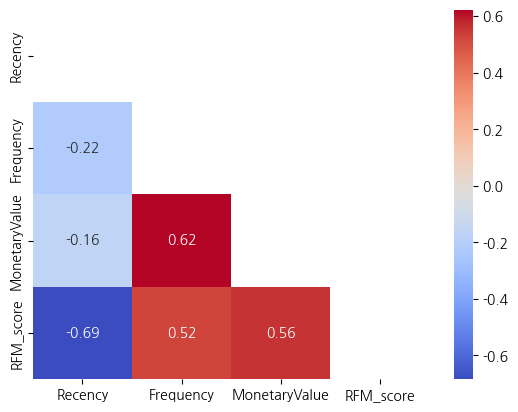

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
# Recency 경우, 최근인 값에 더 높은 점수 부여 -> 음의 상관 관계가 나옴

In [ ]:
# rfm.to_csv('/content/drive/My Drive/RFM.csv')

In [ ]:
pd.read_csv('/content/drive/My Drive/RFM.csv')

,user_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
0,9794320,97,1,13,2,1,1,211,4,blonze
1,10079204,116,1,26,1,1,3,113,5,blonze
2,10280338,11,5,178,5,3,5,535,13,platinum
3,12055855,72,1,17,3,1,2,312,6,silver
4,12936739,44,1,30,4,1,3,413,8,gold
...,...,...,...,...,...,...,...,...,...,...
97021,622065819,1,1,20,5,1,2,512,8,gold
97022,622066161,1,1,13,5,1,1,511,7,silver
97023,622067983,1,1,66,5,1,4,514,10,platinum
97024,622069477,1,1,1,5,1,1,511,7,silver


### k-means 클러스터링

> k평균 이상치에 민감, 중심점과 오브젝트 간 유클리드 거리로 계산

In [ ]:
# 한글 폰트 사용을 위해
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
# 군집화 시각화 위해
!pip install yellowbrick

In [ ]:
rfm = pd.read_csv('/content/drive/MyDrive/RFM.csv', index_col = 'user_id')
rfm.shape

(97026, 9)

In [ ]:
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
9794320,97,1,13,2,1,1,211,4,blonze
10079204,116,1,26,1,1,3,113,5,blonze
10280338,11,5,178,5,3,5,535,13,platinum
12055855,72,1,17,3,1,2,312,6,silver
12936739,44,1,30,4,1,3,413,8,gold


In [ ]:
rfm.isnull().sum()

Recency          0
Frequency        0
MonetaryValue    0
R                0
F                0
M                0
RFM_segment      0
RFM_score        0
RFM_class        0
dtype: int64

In [ ]:
# Recency, Frequency, Monetary만 따로 rfm_cluster 변수에 담아 사용
rfm_cluster = rfm.iloc[:, :3]
rfm_cluster.head()

,Recency,Frequency,MonetaryValue
user_id,,,
9794320,97,1,13
10079204,116,1,26
10280338,11,5,178
12055855,72,1,17
12936739,44,1,30


In [ ]:
rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,97026,97026,97026
mean,62,1,56
std,40,1,83
min,1,1,0
25%,28,1,16
50%,58,1,33
75%,94,1,61
max,152,95,2857


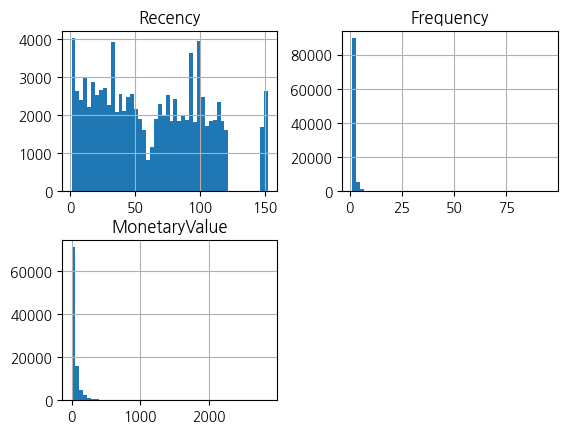

In [ ]:
rfm_cluster.hist(bins=50); # ';' 줄바꿈 표시 의미 -> 로그가 따로 나오지 않는 효과

In [ ]:
# 로그 변환
rfm_cluster_log = np.log1p(rfm_cluster) # 1보다 작을 시 음의 무한대로 향하기 때문에 최솟값 1을 맞춰야함
rfm_cluster_log.head()

,Recency,Frequency,MonetaryValue
user_id,,,
9794320,5,1,3
10079204,5,1,3
10280338,2,2,5
12055855,4,1,3
12936739,4,1,3


In [ ]:
rfm_cluster_log.describe()

,Recency,Frequency,MonetaryValue
count,97026,97026,97026
mean,4,1,4
std,1,0,1
min,1,1,0
25%,3,1,3
50%,4,1,4
75%,5,1,4
max,5,5,8


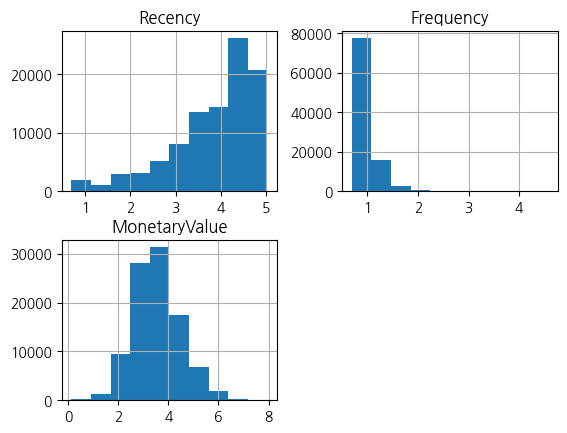

In [ ]:
rfm_cluster_log.hist();

In [ ]:
#스케일링 조정
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
X = ss.fit_transform(rfm_cluster_log)
X = pd.DataFrame(X, columns=rfm_cluster_log.columns)

In [ ]:
X

,Recency,Frequency,MonetaryValue
0,1,-0,-1
1,1,-0,-0
2,-1,4,2
3,0,-0,-1
4,-0,-0,-0
...,...,...,...
97021,-3,-0,-1
97022,-3,-0,-1
97023,-3,-0,1
97024,-3,-0,-3


In [ ]:
ss = StandardScaler()
X_standard = ss.fit_transform(rfm_cluster_log[['Recency', 'MonetaryValue']])
X_standard = pd.DataFrame(X_standard, columns=['Recency', 'MonetaryValue'])

# RobustScaler로 Frequency 컬럼 스케일링
robust_scaler = RobustScaler()
X_robust = rfm_cluster_log.copy()  # rfm_cluster_log 데이터프레임을 복사하여 사용합니다.
X_robust['Frequency'] = robust_scaler.fit_transform(rfm_cluster_log[['Frequency']])

# X_standard와 X_robust 데이터프레임을 통합하여 전체 데이터프레임 X 생성
X = pd.concat([X_standard, X_robust[['Frequency']]], axis=1)

> RobustScaler 중앙값(50%)를 0으로 맞춤

In [ ]:
X.describe().round(2) # 평균 0, 편차 1

,Recency,MonetaryValue,Frequency
count,97026,97026,97026
mean,-0,0,0
std,1,1,0
min,-3,-4,0
25%,-0,-1,0
50%,0,-0,0
75%,1,1,0
max,1,5,4


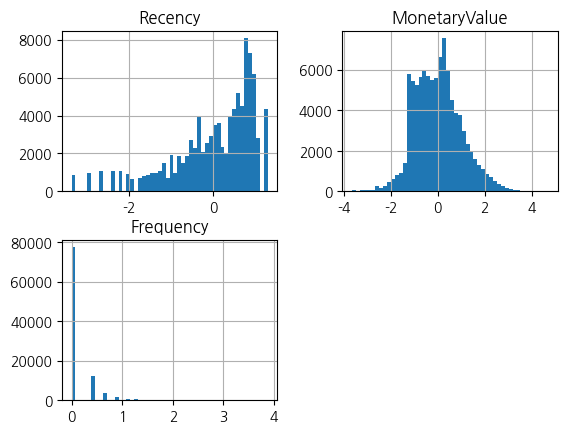

In [ ]:
X.hist(bins=50);

In [ ]:
X

,Recency,MonetaryValue,Frequency
0,1,-1,NaN
1,1,-0,NaN
2,-1,2,NaN
3,0,-1,NaN
4,-0,-0,NaN
...,...,...,...
622065819,NaN,NaN,0
622066161,NaN,NaN,0
622067983,NaN,NaN,0
622069477,NaN,NaN,0


#### KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=6, n_init='auto',random_state=42)
kmeans.fit(X)
kmeans.cluster_centers_, kmeans.inertia_

(array([[ 0.49908146, -0.43827309,  0.52754964],
        [-1.27778677,  3.25766981,  1.86383907],
        [-0.60536932, -0.41482154, -0.72402487],
        [ 0.03249671,  1.2763131 ,  0.81416409],
        [-2.06166121, -0.13944703,  0.19159157],
        [ 0.70718866, -0.42504007, -0.88615933]]),
 74635.20526126053)

In [ ]:
kmeans.cluster_centers_.shape

(6, 3)

In [ ]:
inertia = []
silhouettes = []
range_n_clusters = range(2, 21)

for n_cluster in range_n_clusters:
  kmeans = KMeans(n_clusters=n_cluster, n_init='auto',random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
  silhouettes.append(silhouette_score(X, labels=kmeans.labels_))
  print(n_cluster, end=',')

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,

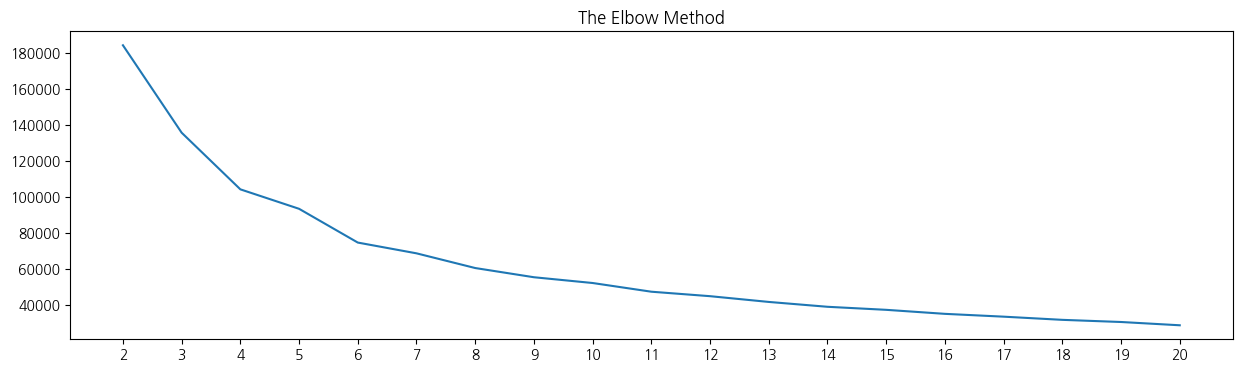

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, inertia)
plt.title('The Elbow Method')
plt.xticks(range_n_clusters)
plt.show()

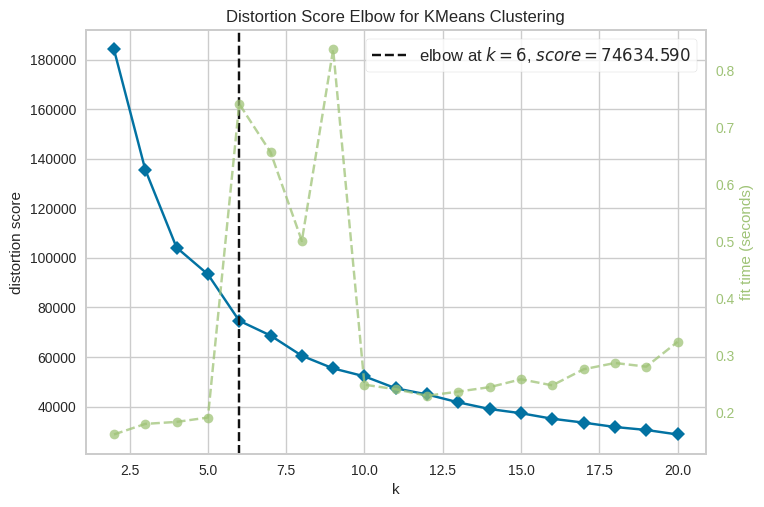

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

KEV = KElbowVisualizer(kmeans, k=20, n_init='auto')
KEV.fit(X)
KEV.show()

6개의 클러스터

In [ ]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [ ]:
kmeans.labels_

array([5, 5, 1, ..., 4, 4, 4], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 0.49908146, -0.43827309,  0.52754964],
       [-1.27778677,  3.25766981,  1.86383907],
       [-0.60536932, -0.41482154, -0.72402487],
       [ 0.03249671,  1.2763131 ,  0.81416409],
       [-2.06166121, -0.13944703,  0.19159157],
       [ 0.70718866, -0.42504007, -0.88615933]])

In [ ]:
pd.Series(kmeans.labels_).value_counts()

0    27953
5    26911
2    16071
3    12810
4     8612
1     4669
Name: count, dtype: int64

In [ ]:
pd.Series(kmeans.labels_).value_counts()

0    27953
5    26911
2    16071
3    12810
4     8612
1     4669
Name: count, dtype: int64

##### 실루엣 분석 시각화

In [ ]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
silhouette_avg

0.3531398405032534

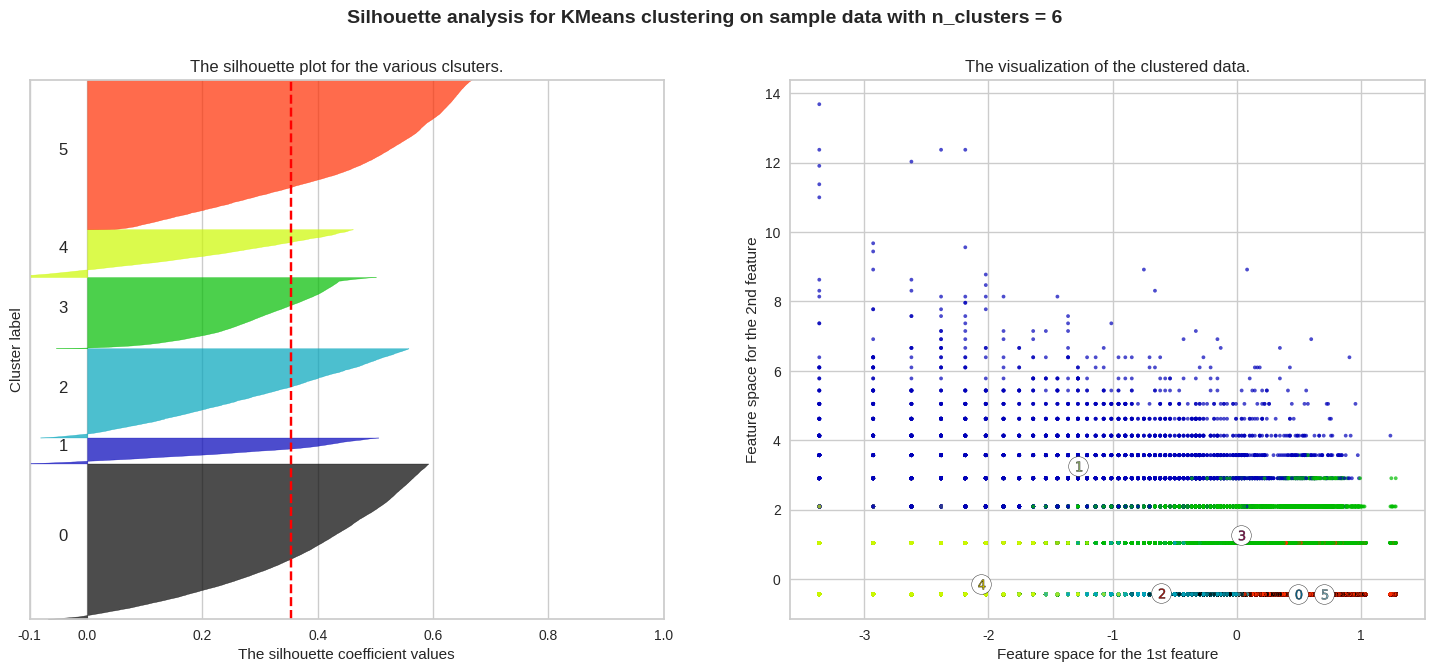

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18,7)

ax1.set_xlim([-0.1, 1])

ax1.set_ylim([0, len(X) + (n_clusters +1) * 10])

cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
  ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(
      np.arange(y_lower, y_upper),
      0,
      ith_cluster_silhouette_values,
      facecolor=color,
      edgecolor=color,
      alpha=0.7,
  )

  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  y_lower = y_upper + 10

ax1.set_title('The silhouette plot for the various clsuters.')
ax1.set_xlabel('The silhouette coefficient values')
ax1.set_ylabel('Cluster label')

ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

ax1.set_yticks([])
ax1.set_xticks([ -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors= cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k'
)

centers = kmeans.cluster_centers_
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker='o',
    c='white',
    alpha=1,
    s=200,
    edgecolor='k',
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor='k')

ax2.set_title('The visualization of the clustered data.')
ax2.set_xlabel('Feature space for the 1st feature')
ax2.set_ylabel('Feature space for the 2nd feature')

plt.suptitle(
    'Silhouette analysis for KMeans clustering on sample data with n_clusters = %d'
    % n_clusters,
    fontsize=14,
    fontweight='bold',
)

plt.show()

In [ ]:
rfm['Cluster'] = kmeans.labels_
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,Cluster
user_id,,,,,,,,,,
9794320,97,1,13,2,1,1,211,4,blonze,5
10079204,116,1,26,1,1,3,113,5,blonze,5
10280338,11,5,178,5,3,5,535,13,platinum,1
12055855,72,1,17,3,1,2,312,6,silver,5
12936739,44,1,30,4,1,3,413,8,gold,2
...,...,...,...,...,...,...,...,...,...,...
622065819,1,1,20,5,1,2,512,8,gold,4
622066161,1,1,13,5,1,1,511,7,silver,4
622067983,1,1,66,5,1,4,514,10,platinum,4


In [ ]:
pd.crosstab(rfm['RFM_class'], rfm['Cluster'])

Cluster,0,1,2,3,4,5
RFM_class,,,,,,
blonze,2339,0,148,16,0,21914
gold,9390,15,5501,4461,2966,0
platinum,1822,4654,372,7139,4771,0
silver,14402,0,10050,1194,875,4997


1 - platinum 2 - silver&gold  3 - platinum&gold 4 - platinum&gold 5 - blonze

In [ ]:
rfm['Cluster'].value_counts()

Cluster
0    27953
5    26911
2    16071
3    12810
4     8612
1     4669
Name: count, dtype: int64

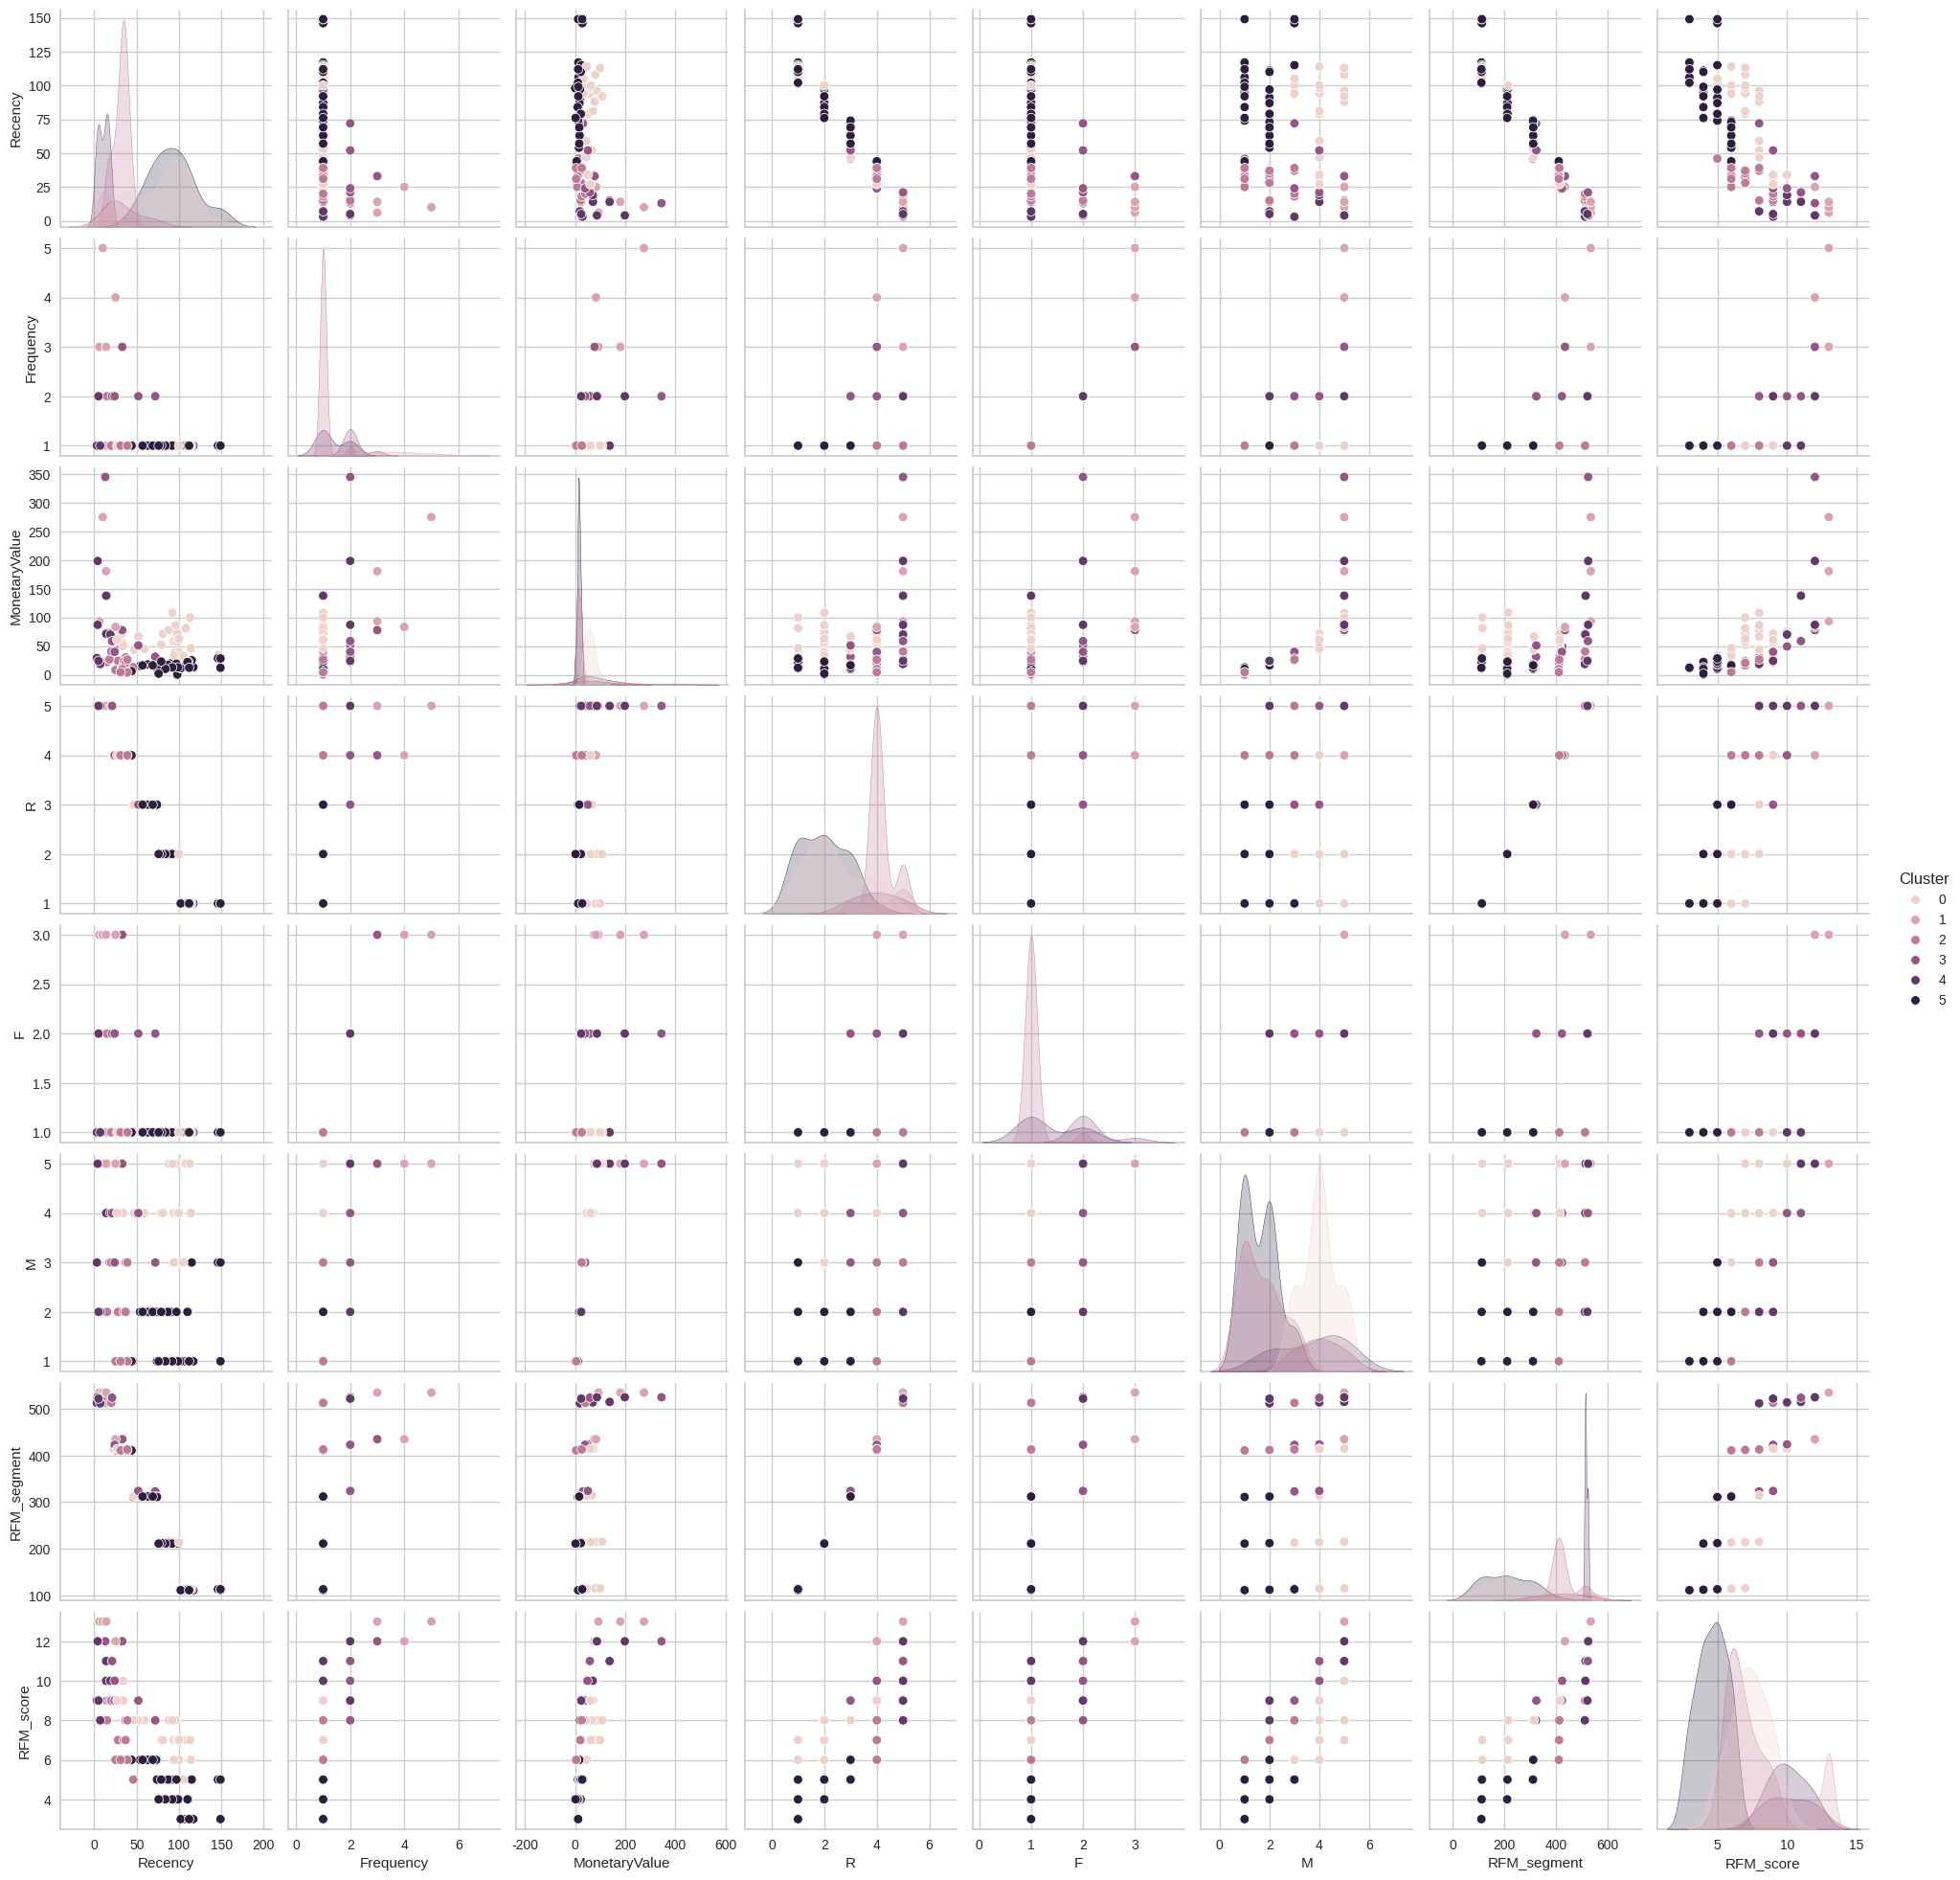

In [ ]:
sns.pairplot(data=rfm.sample(100), hue='Cluster')